# Now let's look at this data plotted with an image for the basemap

In [1]:
#!/usr/bin/python
import json
import requests
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns


/Users/RoscoeBColtrane/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
alldf = pd.read_csv("../data/ALL_Restaurant_Subway_Locations.csv",index_col=False)
restPandI = pd.read_csv("../data/restPandI.csv")
allPizza = pd.read_csv("../data/restPizza.csv")
subway = pd.read_csv("../data/subwayStations.csv", index_col=0)


# Now Plotting with MPL using an image as basemap

In [58]:
## Load from URL
# load image of NYC map
BB = (-74.5, -72.8, 40.5, 41.8)
nyc_map = plt.imread('https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png')

## Load from URL
# load extra image to zoom in on NYC
BB_zoom = (-74.3, -73.7, 40.5, 40.9)
nyc_map_zoom = plt.imread('https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png')

# load local image to zoom in on NYC
BB_loc = (-74.4296, -73.1429, 40.3915, 41.1445)
nyc_map_loc = plt.imread('../data/nyc_-74.3_-73.7_40.5_40.9.png')

In [59]:
#this function will also be used with the test set below
def select_within_boundingbox(df, BB):
    return (df.Longitude >= BB[0]) & (df.Longitude <= BB[1]) & \
           (df.Latitude >= BB[2]) & (df.Latitude <= BB[3]) & \
           (df.Longitude >= BB[0]) & (df.Longitude <= BB[1]) & \
           (df.Latitude >= BB[2]) & (df.Latitude <= BB[3])

In [60]:
# this function will be used more often to plot data on the NYC map
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))
    axs[0].scatter(df.Longitude, df.Latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pizza locations')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(df.Longitude, df.Latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Pizza locations')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)


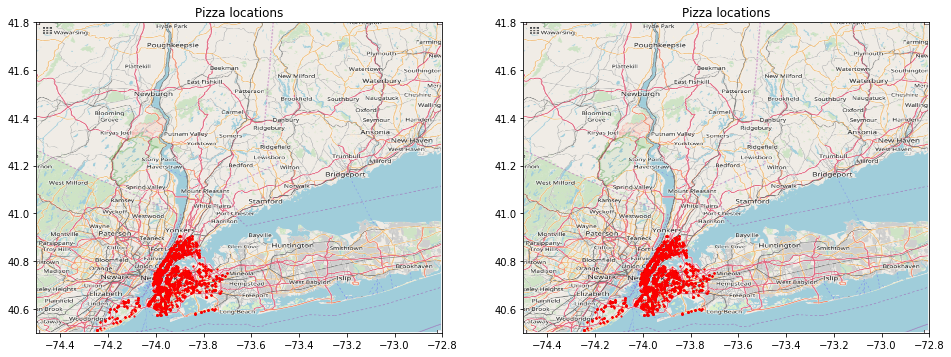

In [61]:
plot_on_map(allPizza, BB, nyc_map, s=1, alpha=0.3)

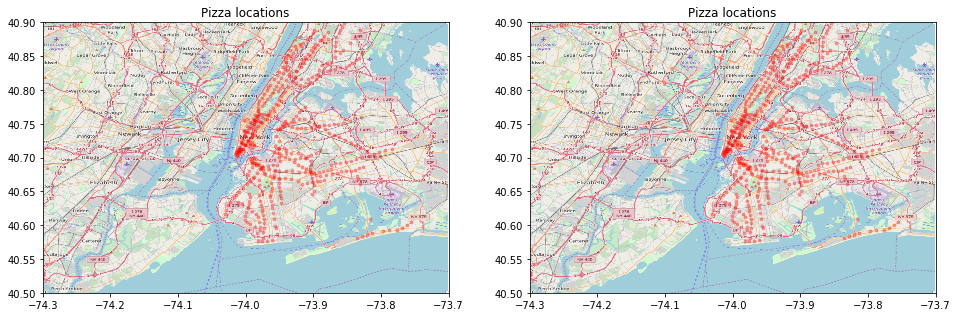

In [34]:
# plot training data on map zoomed in
plot_on_map(subway, BB_zoom, nyc_map_zoom, s=8, alpha=0.3)

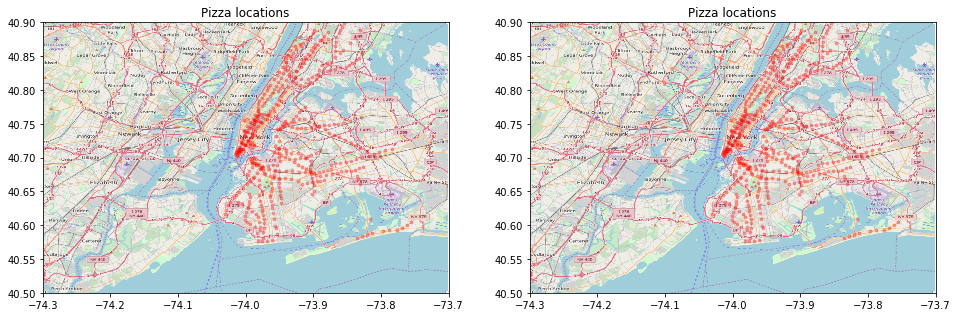

In [35]:
# plot training data on map from local image
plot_on_map(subway, BB_zoom, nyc_map_loc, s=8, alpha=0.3)